<h1 align='center'> <b><i> ACM-AI-Task 2 </i></b> </h1>
<h3 align='center'> Ouldouz Neysari </h3>
<h3 align='center'> Hesam Asadollahzadeh </h3>

## Q1: Import & describe the data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import csv
import statistics

In [2]:
data=pd.read_csv('AdmissionPredict.csv')
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,378.000000,380.000000,400.000000,400.000000,400.000000,380.000000,400.000000,384.000000
mean,200.500000,316.759259,107.386842,3.087500,3.400000,3.452500,8.604737,0.547500,0.724375
std,115.614301,11.415599,6.048645,1.143728,1.006869,0.898478,0.599167,0.498362,0.142964
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.250000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.640000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.080000,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          378 non-null    float64
 2   TOEFL Score        380 non-null    float64
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               380 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    384 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 28.2 KB


## Q2: Finding NaN values in each column

In [4]:
columns = data.columns
for column in columns:
    print("Number of NaN data in column\t", column, "= ", data[column].isna().sum())

Number of NaN data in column	 Serial No. =  0
Number of NaN data in column	 GRE Score =  22
Number of NaN data in column	 TOEFL Score =  20
Number of NaN data in column	 University Rating =  0
Number of NaN data in column	 SOP =  0
Number of NaN data in column	 LOR  =  0
Number of NaN data in column	 CGPA =  20
Number of NaN data in column	 Research =  0
Number of NaN data in column	 Chance of Admit =  16


## Q3: Using two methods to fill missing values

In [5]:
data = data[data['Chance of Admit'].notna()]

In [6]:
columns=data.columns
data_mean=pd.DataFrame()
for column in columns:
    data_mean[column]=data[column].fillna(data[column].mean())

In [7]:
data_median=pd.DataFrame()
for column in columns:
    data_median[column]=data[column].fillna(data[column].median())

* In the case of fields like salary, the data may be skewed. In such cases, it may not be a good idea to use mean imputation for replacing the missing values. When the data is skewed, it is good to consider using median value for replacing the missing values. 
* In the case of fields like testscores and GPA, it may be a good idea to use mean value for replacing missing values.

## Q4: Plotting data

In [8]:
# axs[0,0].scatter(data['Serial No.'],data['Chance of Admit'])
# axs[0,1].scatter(data['GRE Score'],data['Chance of Admit'])
# axs[0,2].scatter(data['TOEFL Score'],data['Chance of Admit'])
# axs[0,3].scatter(data['University Rating'],data['Chance of Admit'])
# axs[1,0].scatter(data['SOP'],data['Chance of Admit'])
# axs[1,1].scatter(data['LOR '],data['Chance of Admit'])
# axs[1,2].scatter(data['CGPA'],data['Chance of Admit'])
# axs[1,3].scatter(data['Research'],data['Chance of Admit'])

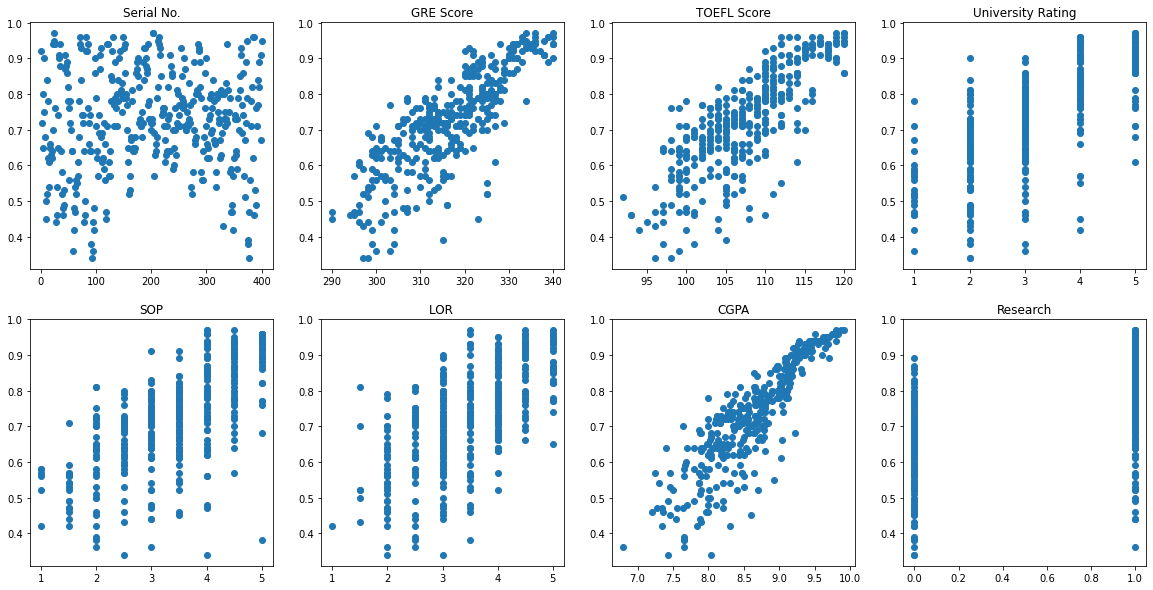

<Figure size 432x288 with 0 Axes>

In [9]:
fig,axs=plt.subplots(2,4, figsize=(20,10))
plt.figure()
c = 0
for i in range(2):
    for j in range(4):
        axs[i,j].scatter(data[columns[c]], data['Chance of Admit'])
        axs[i,j].set_title(columns[c])
        c += 1
plt.show()

## Q5: Choosing the best feature

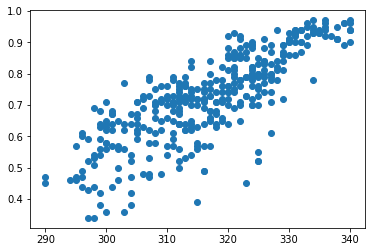

In [10]:
plt.scatter(data['GRE Score'],data['Chance of Admit'])

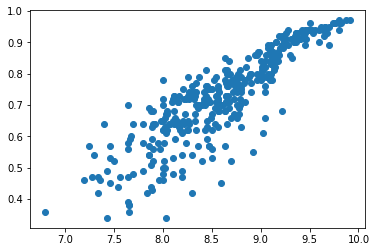

In [11]:
plt.scatter(data['CGPA'],data['Chance of Admit'])

## Q6: Regression

In [12]:
def create_df1(data):
    finaldf = pd.DataFrame()
    finaldf.insert(0, 'CGPA', data['CGPA'], True)
    finaldf.insert(0, 'Chance of Admit', data['Chance of Admit'], True)
    slice_index = int(0.8 * len(finaldf))
    traindf = finaldf[0:slice_index]
    testdf = finaldf[slice_index:]
    return traindf, testdf

In [13]:
def norm_equation1(finaldf):
    X0 = [1] * len(finaldf)
    X1 = list(finaldf['CGPA'])
    X = np.array([X0, X1])
    X = X.T
    theta = np.linalg.inv(X.T @ X)
    theta = theta @ X.T
    theta = theta @ np.array(finaldf['Chance of Admit'])
    return X, theta

In [14]:
def linear_model(theta, x):
    return theta[0] + theta[1] * x

In [15]:
traindf, testdf = create_df1(data_mean)
X, theta = norm_equation1(traindf)
model = linear_model(theta, traindf['CGPA'])
print("theta =", theta)

theta = [-1.08732357  0.21004009]


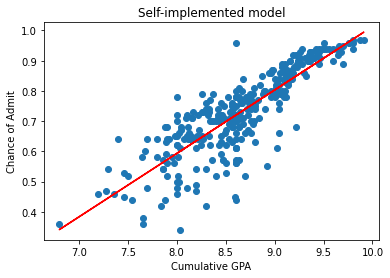

In [16]:
plt.scatter(traindf['CGPA'], traindf['Chance of Admit'])
plt.plot(traindf['CGPA'], model, c='r')
plt.xlabel('Cumulative GPA')
plt.ylabel('Chance of Admit')
plt.title('Self-implemented model')
plt.show()

In [17]:
pred = linear_model(theta, testdf['CGPA'])
preddf = pd.DataFrame()
preddf['pred'] = pred
preddf['Chance'] = testdf['Chance of Admit']
preddf

,pred,Chance
318,0.761029,0.79
319,0.737925,0.80
320,0.698017,0.75
321,0.685415,0.73
322,0.649708,0.72
...,...,...
394,0.851346,0.89
395,0.811439,0.82
397,0.897555,0.91
398,0.756828,0.67


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [19]:
print("MSE of self-implemented model is: %.6f" % mean_squared_error(preddf['Chance'], preddf['pred']))

MSE of self-implemented model is: 0.004898


Text(0.5, 1.0, 'Scikit-learn model')

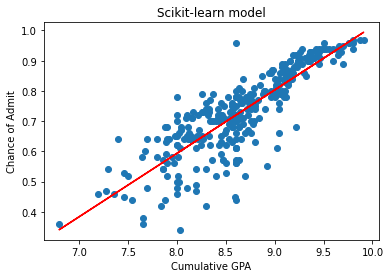

In [20]:
reg = LinearRegression().fit(X, traindf['Chance of Admit'])
pred = reg.predict(X)
plt.scatter(traindf['CGPA'], traindf['Chance of Admit'])
plt.plot(traindf['CGPA'], pred, c='r')
plt.xlabel('Cumulative GPA')
plt.ylabel('Chance of Admit')
plt.title('Scikit-learn model')

In [21]:
X, theta = norm_equation1(testdf)
pred = reg.predict(X)
print("Score of our single feature based model is: %.3f" % reg.score(X, testdf['Chance of Admit']))
print("MSE of scikit-learn model is: %.6f" % mean_squared_error(testdf['Chance of Admit'], pred))

Score of our single feature based model is: 0.785
MSE of scikit-learn model is: 0.004898


### Using scaler

Text(0.5, 1.0, 'Scikit-learn model')

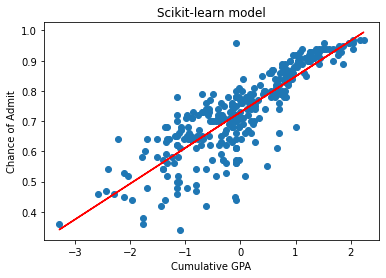

In [22]:
traindf['CGPA'] = scale(traindf['CGPA'])
X, theta = norm_equation1(traindf)
reg = LinearRegression().fit(X, traindf['Chance of Admit'])
pred = reg.predict(X)
plt.scatter(traindf['CGPA'], traindf['Chance of Admit'])
plt.plot(traindf['CGPA'], pred, c='r')
plt.xlabel('Cumulative GPA')
plt.ylabel('Chance of Admit')
plt.title('Scikit-learn model')

## Using three features:

In [23]:
def X3(finaldf):
    X0 = [1] * len(finaldf)
    X1 = list(finaldf['CGPA'])
    X2 = list(finaldf['TOEFL Score'])
    X3 = list(finaldf['GRE Score'])
    X = np.array([X0, X1, X2, X3])
    X = X.T
    return X

In [24]:
def create_df3(data):
    finaldf = pd.DataFrame()
    finaldf.insert(0, 'CGPA', data['CGPA'], True)
    finaldf.insert(0, 'TOEFL Score', data['TOEFL Score'], True)
    finaldf.insert(0, 'GRE Score', data['GRE Score'], True)
    finaldf.insert(0, 'Chance of Admit', data['Chance of Admit'], True)
    slice_index = int(0.8 * len(finaldf))
    traindf = finaldf[0:slice_index]
    testdf = finaldf[slice_index:]
    return traindf, testdf

In [25]:
traindf3, testdf3 = create_df3(data_mean)
X = X3(traindf3)
reg = LinearRegression().fit(X, traindf3['Chance of Admit'])
print("Score of our three feature based model is: %.3f" % reg.score(X3(testdf3), testdf3['Chance of Admit']))
X = X3(testdf3)
pred = reg.predict(X)
print("MSE of scikit-learn model is: %.6f" % mean_squared_error(testdf['Chance of Admit'], pred))

Score of our three feature based model is: 0.829
MSE of scikit-learn model is: 0.003893


## Using all features

In [26]:
X0 = [1] * len(data_mean)
X1 = list(data_mean['CGPA'])
X2 = list(data_mean['TOEFL Score'])
X3 = list(data_mean['GRE Score'])
X4 = list(data_mean['University Rating'])
X5 = list(data_mean['SOP'])
X6 = list(data_mean['LOR '])
X7 = list(data_mean['Research'])
X = np.array([X0, X1, X2, X3, X4, X5, X6, X7])
X = X.T
traindf_all = X[0:int(0.8*len(X))]
testdf_all = X[int(0.8*len(X)):]

In [27]:
reg = LinearRegression().fit(traindf_all, data_mean['Chance of Admit'][0:int(0.8*len(data_mean))])
print("Score of our all-features based model is: %.3f" % reg.score(testdf_all, data_mean['Chance of Admit'][int(0.8*len(data_mean)):]))

Score of our all-features based model is: 0.809


## Using median for missing values:

In [28]:
traindf, testdf = create_df1(data_median)
X, theta = norm_equation1(traindf)
model = linear_model(theta, traindf['CGPA'])
print("theta =", theta)

theta = [-1.08629158  0.20988878]


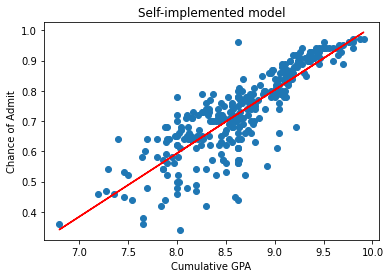

In [29]:
plt.scatter(traindf['CGPA'], traindf['Chance of Admit'])
plt.plot(traindf['CGPA'], model, c='r')
plt.xlabel('Cumulative GPA')
plt.ylabel('Chance of Admit')
plt.title('Self-implemented model')
plt.show()

In [30]:
pred = linear_model(theta, testdf['CGPA'])
preddf = pd.DataFrame()
preddf['pred'] = pred
preddf['Chance'] = testdf['Chance of Admit']
preddf

,pred,Chance
318,0.760730,0.79
319,0.737642,0.80
320,0.697763,0.75
321,0.685170,0.73
322,0.649489,0.72
...,...,...
394,0.850982,0.89
395,0.811103,0.82
397,0.897157,0.91
398,0.756532,0.67


In [31]:
print("MSE of self-implemented model is: %.6f" % mean_squared_error(preddf['Chance'], preddf['pred']))

MSE of self-implemented model is: 0.004886


In [32]:
reg = LinearRegression().fit(X, traindf['Chance of Admit'])

In [33]:
X, theta = norm_equation1(testdf)
pred = reg.predict(X)
print("Score of our single feature based model is: %.3f" % reg.score(X, testdf['Chance of Admit']))
print("MSE of scikit-learn model is: %.6f" % mean_squared_error(testdf['Chance of Admit'], pred))

Score of our single feature based model is: 0.786
MSE of scikit-learn model is: 0.004886


## Using three features:

In [34]:
def X3(finaldf):
    X0 = [1] * len(finaldf)
    X1 = list(finaldf['CGPA'])
    X2 = list(finaldf['TOEFL Score'])
    X3 = list(finaldf['GRE Score'])
    X = np.array([X0, X1, X2, X3])
    X = X.T
    return X

In [35]:
traindf3, testdf3 = create_df3(data_median)
X = X3(traindf3)
reg = LinearRegression().fit(X, traindf3['Chance of Admit'])
print("Score of our three feature based model is: %.3f" % reg.score(X3(testdf3), testdf3['Chance of Admit']))
X = X3(testdf3)
pred = reg.predict(X)
print("MSE of scikit-learn model is: %.6f" % mean_squared_error(testdf3['Chance of Admit'], pred))

Score of our three feature based model is: 0.829
MSE of scikit-learn model is: 0.003889


## Using All features

In [36]:
X0 = [1] * len(data_median)
X1 = list(data_median['CGPA'])
X2 = list(data_median['TOEFL Score'])
X3 = list(data_median['GRE Score'])
X4 = list(data_median['University Rating'])
X5 = list(data_median['SOP'])
X6 = list(data_median['LOR '])
X7 = list(data_median['Research'])
X = np.array([X0, X1, X2, X3, X4, X5, X6, X7])
X = X.T
traindf_all = X[0:int(0.8*len(X))]
testdf_all = X[int(0.8*len(X)):]

In [37]:
reg = LinearRegression().fit(traindf_all, data_median['Chance of Admit'][0:int(0.8*len(data_median))])
print("Score of our all-features based model is: %.3f" % reg.score(testdf_all, data_median['Chance of Admit'][int(0.8*len(data_median)):]))

Score of our all-features based model is: 0.809


* MSE of data filled by median is less than the data filled by mean. So, we can say that filling the missing data with the median value would be better for our model's accuracy.

## Q10: Sin Wave & Gaussian Noise

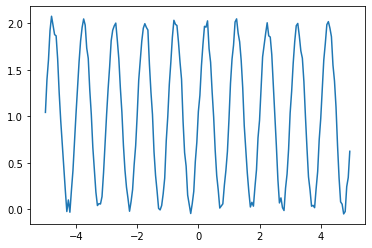

In [38]:
x = np.arange(-5, 5, 0.05)
y = np.sin(2 * np.pi * x)
noise = np.random.normal(1, 0.05, 200)
plt.plot(x, y+noise)

In [39]:
from numpy.polynomial.polynomial import polyfit

In [40]:
y = y + noise
c = polyfit(x, y, 3)

In [41]:
def polynomial(deg, c):
    y = 0
    for i in range(deg+1):
        y += c[i] * (x**i)
    return y

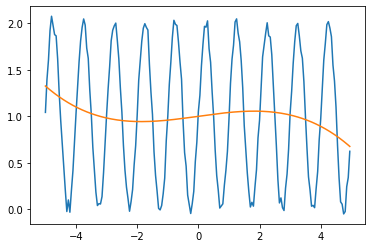

In [42]:
plt.plot(x, y)
plt.plot(x, polynomial(3, c))

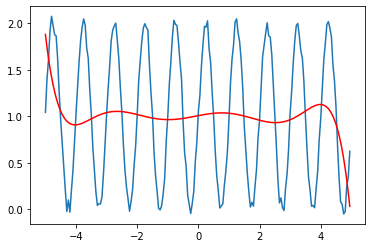

In [43]:
c = polyfit(x, y, 7)
plt.plot(x, y)
plt.plot(x, polynomial(7, c), c='r')

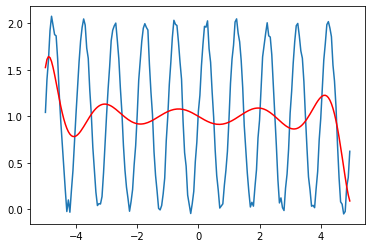

In [44]:
c = polyfit(x, y, 11)
plt.plot(x, y)
plt.plot(x, polynomial(11, c), c='r')

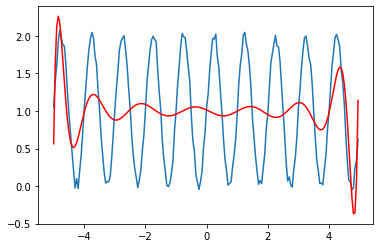

In [45]:
c = polyfit(x, y, 16)
plt.plot(x, y)
plt.plot(x, polynomial(16, c), c='r')

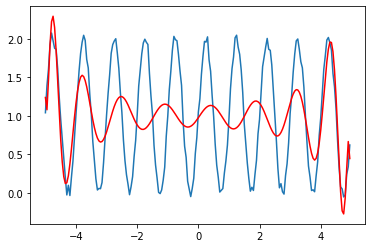

In [46]:
c = polyfit(x, y, 20)
plt.plot(x, y)
plt.plot(x, polynomial(20, c), c='r')

C:\Users\Hesam.A\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\polynomial\polynomial.py:1361: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


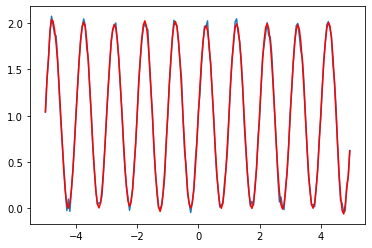

In [47]:
c = polyfit(x, y, 40)
plt.plot(x, y)
plt.plot(x, polynomial(40, c), c='r')

* All of the polynomials are under-fitting but the curve of degree 40 is fitting to our sine wave.